In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Arrays

In [5]:
my_array = make_array(1, 2, 3, 4)

In [6]:
my_array

array([1, 2, 3, 4])

In [7]:
my_array * 2

array([2, 4, 6, 8])

In [8]:
my_array ** 2

array([ 1,  4,  9, 16])

In [9]:
my_array + 1

array([2, 3, 4, 5])

In [10]:
my_array # array is unchanged

array([1, 2, 3, 4])

In [11]:
len(my_array)

4

In [12]:
sum(my_array)

10

In [13]:
sum(my_array) / len(my_array)

2.5

In [14]:
np.average(my_array)

2.5

In [15]:
another = make_array(60, 70, 80, 90)

In [16]:
my_array + another

array([61, 72, 83, 94])

In [17]:
yet_another = make_array(5, 6, 7)

In [18]:
my_array + yet_another

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [19]:
tunas = make_array('bluefin', 'albacore', 'jim')
tunas

array(['bluefin', 'albacore', 'jim'], dtype='<U8')

In [20]:
tunas * 4

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> dtype('<U8')

In [21]:
tunas.item(0)

'bluefin'

In [22]:
tunas.item(2)

'jim'

In [23]:
tunas.item(3)

IndexError: index 3 is out of bounds for axis 0 with size 3

## Columns of Tables are Arrays ##

In [24]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
warriors = nba.where('TEAM', 'Golden State Warriors')

In [25]:
warriors

PLAYER,POSITION,TEAM,SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


In [26]:
warriors.select('SALARY')

SALARY
15.501
14.2609
13.8
11.7105
11.3708
7.00847
5.54373
3.8734
3.815
2.5


In [27]:
warriors.column('SALARY')

array([15.501   , 14.26087 , 13.8     , 11.710456, 11.370786,  7.008475,
        5.543725,  3.873398,  3.815   ,  2.5     ,  2.008748,  1.270964,
        1.13196 ,  0.289755])

In [28]:
np.average(warriors.column('SALARY'))

6.72036692857143

In [29]:
raptors = nba.where('TEAM', 'Toronto Raptors')

In [30]:
np.average(warriors.column('SALARY')) - np.average(raptors.column('SALARY'))

2.3278598697479005

## Ranges ##

In [14]:
make_array(0, 1, 2, 3, 4, 5, 6)

array([0, 1, 2, 3, 4, 5, 6])

In [15]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [16]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [17]:
np.arange(5, 11)

array([ 5,  6,  7,  8,  9, 10])

In [18]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [19]:
np.arange(0, 21, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [20]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [21]:
a = np.arange(8)

In [22]:
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
a.item(8)

IndexError: index 8 is out of bounds for axis 0 with size 8

## Creating a Table from Scratch ##

In [24]:
streets = make_array('Bancroft', 'Durant', 'Channing', 'Haste')
streets

array(['Bancroft', 'Durant', 'Channing', 'Haste'], dtype='<U8')

In [25]:
Table()

In [26]:
southside = Table().with_column('Streets', streets)
southside

Streets
Bancroft
Durant
Channing
Haste


In [27]:
southside.with_column('Blocks from campus', np.arange(4))

Streets,Blocks from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [28]:
southside

Streets
Bancroft
Durant
Channing
Haste


In [29]:
southside = southside.with_column('Blocks from campus', np.arange(4))
southside

Streets,Blocks from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [30]:
southside.labels

('Streets', 'Blocks from campus')

In [31]:
southside.num_columns

2

In [32]:
southside.num_rows

4

## Reading a Table from a File  ##

In [33]:
du_bois = Table.read_table('du_bois.csv')
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO


In [ ]:
# Which group ("CLASS") spent the highest percentage on rent?
...

In [34]:
du_bois.select('STATUS')

STATUS
POOR
POOR
FAIR
FAIR
COMFORTABLE
COMFORTABLE
WELL-TO-DO


In [35]:
du_bois.column('STATUS')

array(['POOR', 'POOR', 'FAIR', 'FAIR', 'COMFORTABLE', 'COMFORTABLE',
       'WELL-TO-DO'], dtype='<U11')

In [36]:
du_bois.select('STATUS')

STATUS
POOR
POOR
FAIR
FAIR
COMFORTABLE
COMFORTABLE
WELL-TO-DO


In [37]:
du_bois.column('STATUS')

array(['POOR', 'POOR', 'FAIR', 'FAIR', 'COMFORTABLE', 'COMFORTABLE',
       'WELL-TO-DO'], dtype='<U11')

In [38]:
du_bois.column('ACTUAL AVERAGE')

array([ 139.1 ,  249.45,  335.66,  433.82,  547.  ,  880.  , 1125.  ])

In [39]:
du_bois.column('FOOD')

array([0.43, 0.47, 0.43, 0.37, 0.31, 0.37, 0.29])

In [40]:
du_bois.column('ACTUAL AVERAGE') * du_bois.column('FOOD')

array([ 59.813 , 117.2415, 144.3338, 160.5134, 169.57  , 325.6   ,
       326.25  ])

In [41]:
food_dollars = du_bois.column('ACTUAL AVERAGE') * du_bois.column('FOOD')
du_bois = du_bois.with_column(
    'Food $',
    food_dollars
)
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food $
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO,326.25


In [42]:
du_bois.set_format('FOOD', PercentFormatter)

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food $
100-200,139.1,0.19,43.00%,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,47.00%,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,43.00%,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,37.00%,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,31.00%,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,37.00%,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,29.00%,0.16,0.045,0.505,WELL-TO-DO,326.25


In [43]:
du_bois.select('CLASS', 'ACTUAL AVERAGE', 'FOOD', 'Food $')

CLASS,ACTUAL AVERAGE,FOOD,Food $
100-200,139.1,43.00%,59.813
200-300,249.45,47.00%,117.241
300-400,335.66,43.00%,144.334
400-500,433.82,37.00%,160.513
500-750,547,31.00%,169.57
750-1000,880,37.00%,325.6
1000 and over,1125,29.00%,326.25


In [44]:
du_bois.column('FOOD')

array([0.43, 0.47, 0.43, 0.37, 0.31, 0.37, 0.29])

## Selecting data in a column ##

In [45]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,9.16,11237.9,788,Avengers: Endgame
2018,9.11,11611.3,878,Black Panther
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens
2014,8.17,10436.8,708,American Sniper
2013,8.13,10955.9,689,The Hunger Games: Catching Fire
2012,7.96,10959.6,669,The Avengers
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2
2010,7.89,10212.7,538,Toy Story 3


In [46]:
gross_in_dollars = movies.column('Total Gross') * 1e6
tix_sold = gross_in_dollars / movies.column('Average Ticket Price')

In [47]:
movies = movies.with_column('Tickets sold', tix_sold)

In [48]:
movies.show(4)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,1.22684e+09
2018,9.11,11611.3,878,Black Panther,1.27457e+09
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,1.24029e+09
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,1.31488e+09


In [49]:
movies.set_format('Tickets sold', NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,"1,226,844,978.17"
2018,9.11,11611.3,878,Black Panther,"1,274,566,410.54"
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
2014,8.17,10436.8,708,American Sniper,"1,277,454,100.37"
2013,8.13,10955.9,689,The Hunger Games: Catching Fire,"1,347,589,175.89"
2012,7.96,10959.6,669,The Avengers,"1,376,834,170.85"
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2010,7.89,10212.7,538,Toy Story 3,"1,294,385,297.85"


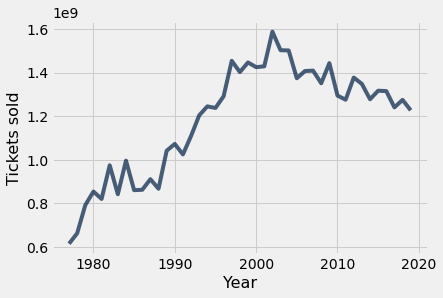

In [50]:
movies.plot('Year', 'Tickets sold')

In [51]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2004,6.21,9321.7,551,Shrek 2,"1,501,078,904.99"
2003,6.03,9057.5,506,The Lord of the Rings: The Return of the King,"1,502,072,968.49"
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"
2000,5.39,7678.3,371,How the Grinch Stole Christmas,"1,424,545,454.55"


In [52]:
movies.where('Year', 2002)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"


In [53]:
movies.where('Year', are.equal_to(2002))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"


In [54]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"


In [55]:
movies.take(np.arange(2, 5))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
